In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('dataset\Raw_data_1Hr_2015_2024_Mandir_Marg_Delhi_DPCC.csv')

In [45]:
df.tail()

,Timestamp,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP
87667,31-12-2024 19.00,193.0,245.0,8.85,80.25,57.62,4.42,1.82,24.80,11.05,88.75,0.3,258.75,3.00,986.0
87668,31-12-2024 20.00,165.0,226.0,12.60,76.10,56.40,3.95,1.94,26.55,10.35,90.75,0.3,246.50,3.25,986.0
87669,31-12-2024 21.00,181.0,222.0,20.80,76.18,56.85,0.50,2.09,29.55,9.90,91.75,0.3,258.75,4.25,986.0
87670,31-12-2024 22.00,210.0,245.0,43.68,91.85,57.38,NaN,2.47,35.70,9.60,93.00,0.3,244.50,4.00,986.0
87671,31-12-2024 23.00,244.0,284.0,51.98,98.18,57.40,NaN,2.48,37.20,9.12,93.25,0.3,245.50,4.00,986.0


In [46]:
df = df.rename(columns={'Timestamp': 'Timestamp'})
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format="%d-%m-%Y %H.%M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  87672 non-null  datetime64[ns]
 1   PM2.5      76973 non-null  float64       
 2   PM10       77234 non-null  float64       
 3   NO         75595 non-null  float64       
 4   NO2        76555 non-null  float64       
 5   NH3        75934 non-null  float64       
 6   SO2        74546 non-null  float64       
 7   CO         75144 non-null  float64       
 8   Ozone      75821 non-null  float64       
 9   AT         77414 non-null  float64       
 10  RH         77508 non-null  float64       
 11  WS         78462 non-null  float64       
 12  WD         77639 non-null  float64       
 13  SR         78021 non-null  float64       
 14  BP         78037 non-null  float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 10.0 MB


In [47]:
df.head()

,Timestamp,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP
0,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


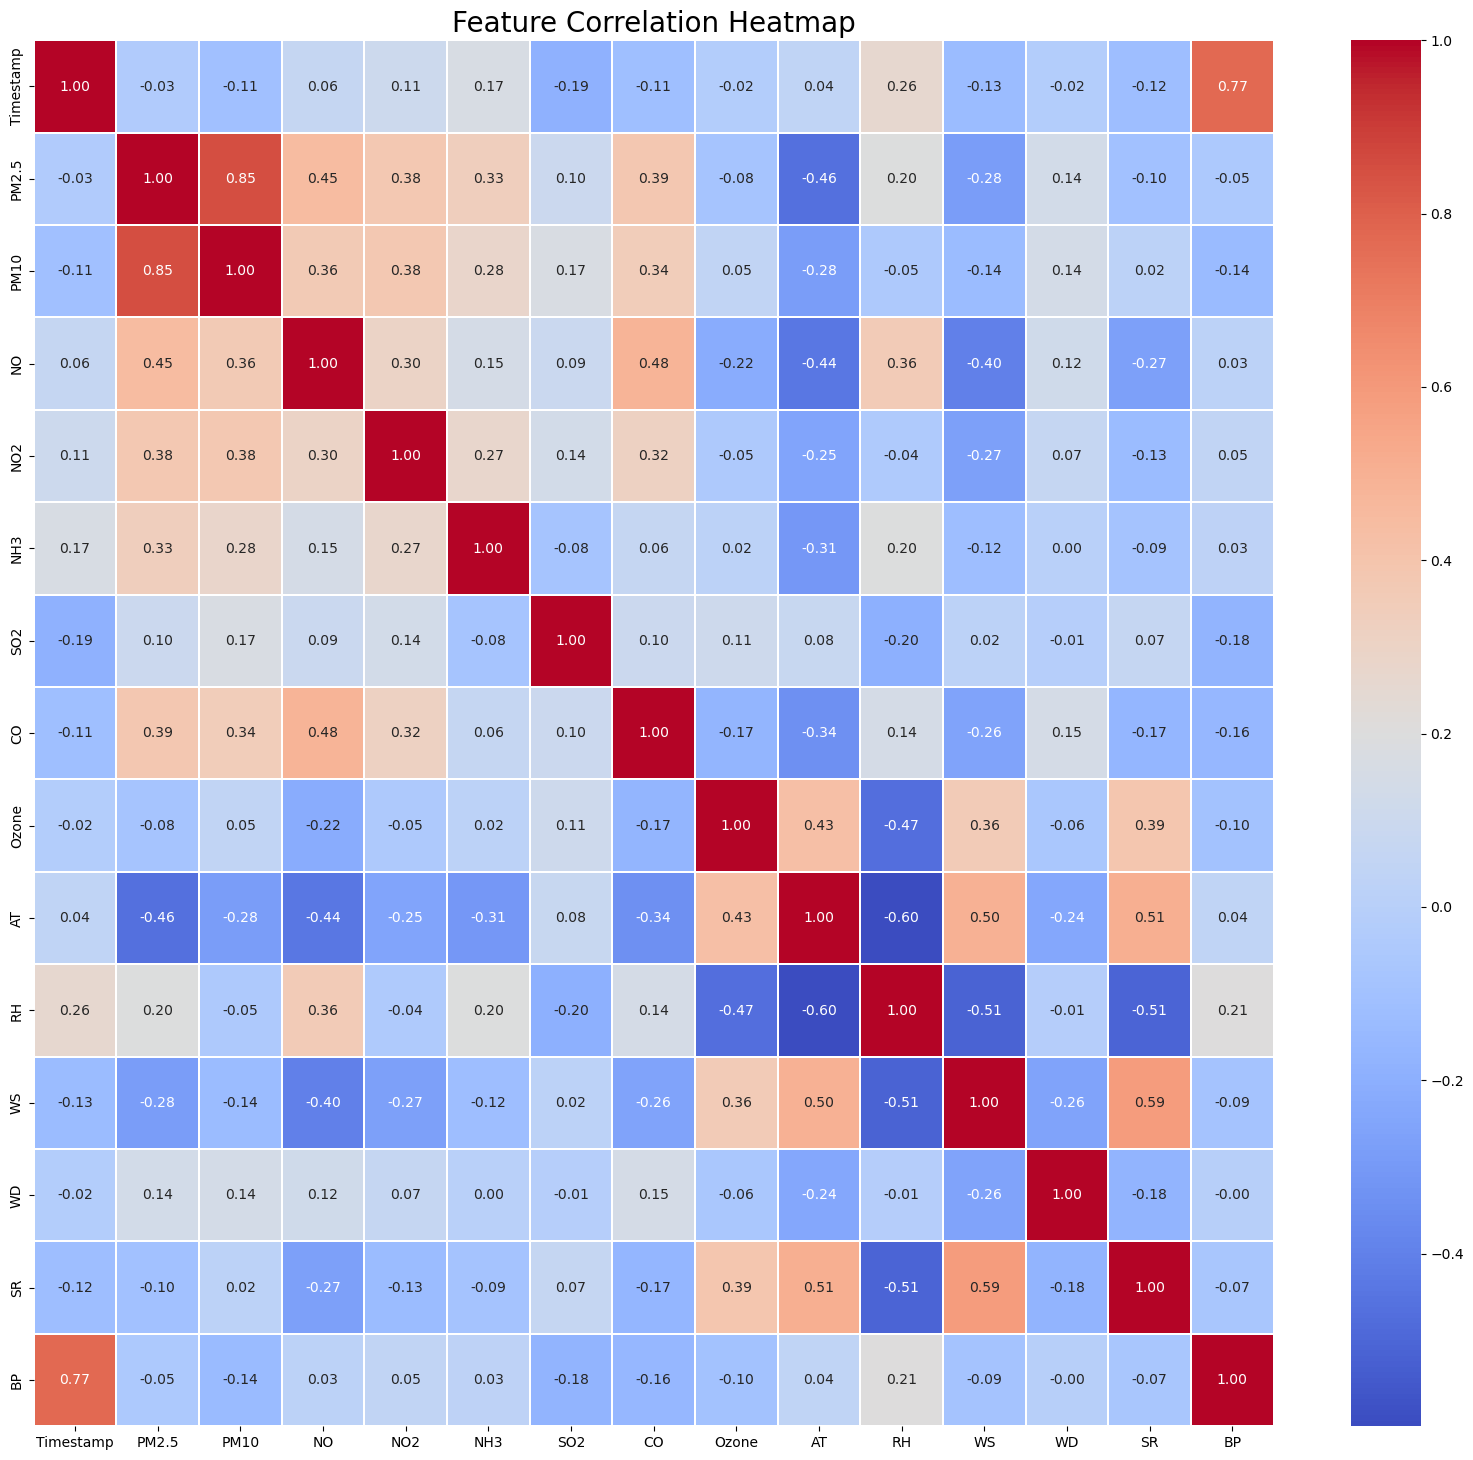

In [48]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.show()

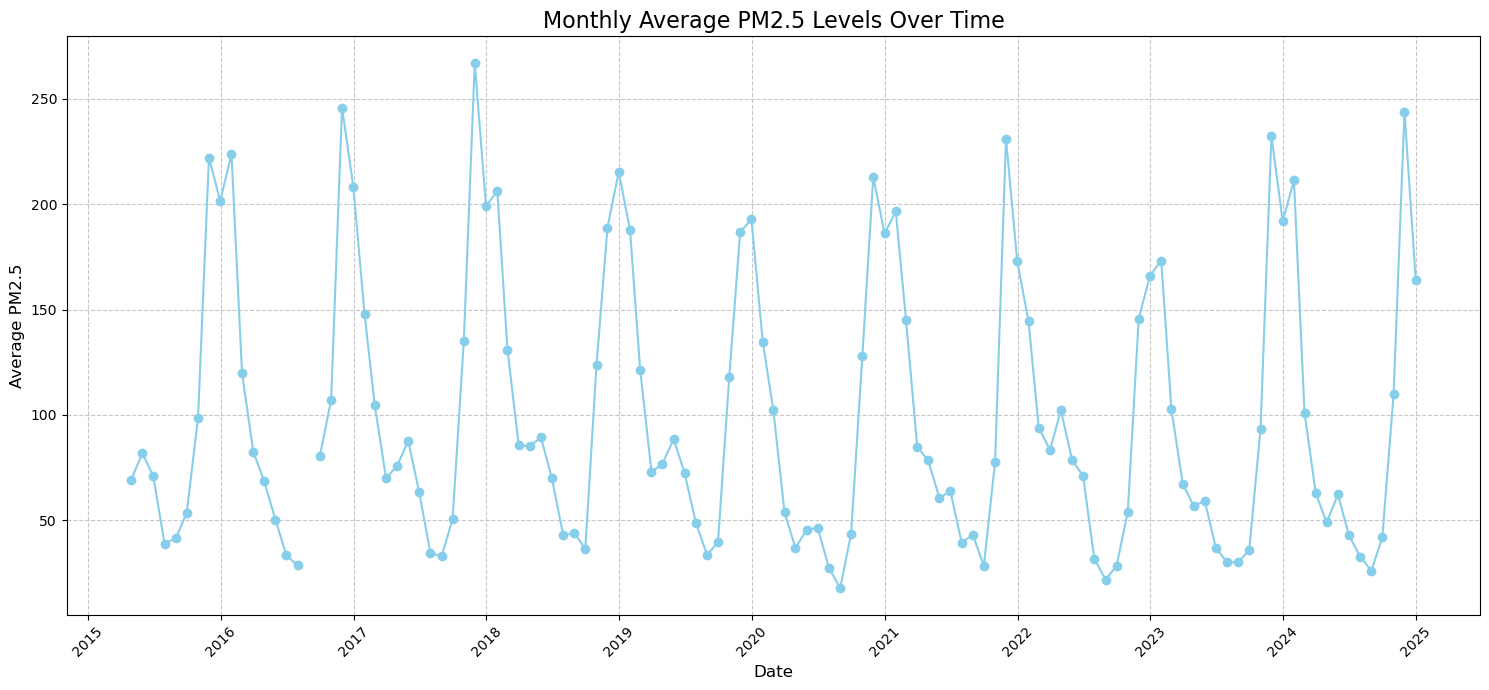

In [49]:
df = df.set_index('Timestamp')
df_monthly = df['PM2.5'].resample('ME').mean()

plt.figure(figsize=(15, 7))
plt.plot(df_monthly.index, df_monthly, marker='o', linestyle='-', color='skyblue')
plt.title('Monthly Average PM2.5 Levels Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average PM2.5', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

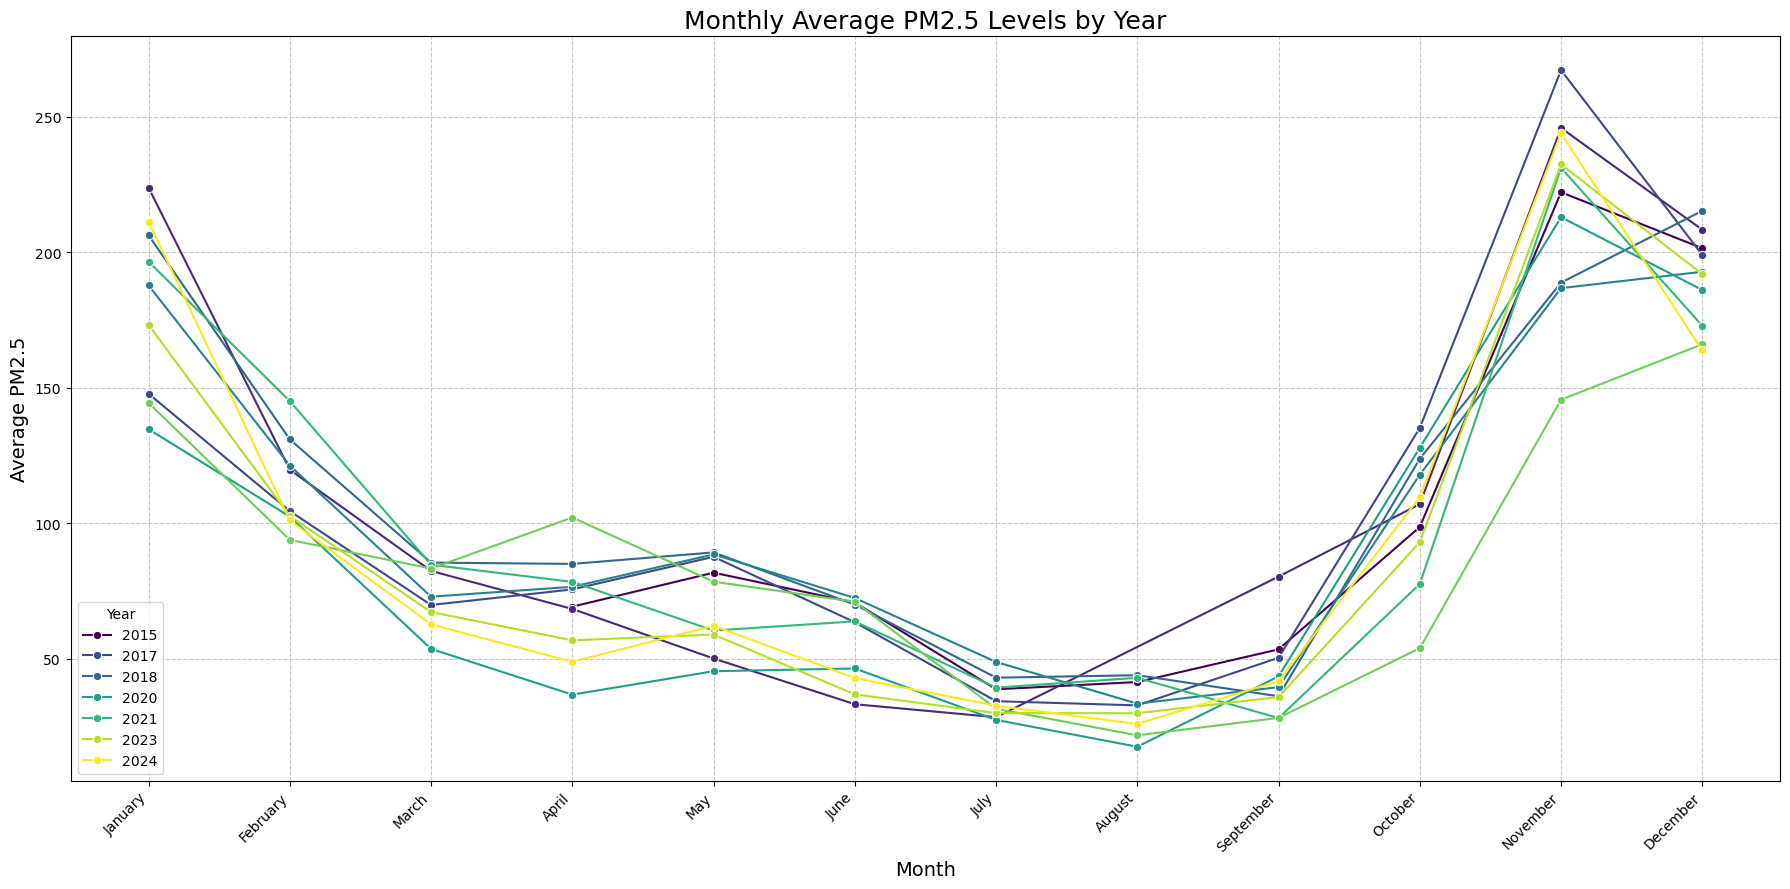

In [50]:
# Create a DataFrame from the monthly series for plotting
df_monthly_plot = df_monthly.reset_index()
df_monthly_plot.columns = ['Date', 'PM2.5']

# Extract Year and Month Name for plotting
df_monthly_plot['Year'] = df_monthly_plot['Date'].dt.year
df_monthly_plot['Month'] = df_monthly_plot['Date'].dt.month_name() # Get full month names

# Define the order of months for correct plotting
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
df_monthly_plot['Month'] = pd.Categorical(df_monthly_plot['Month'], categories=month_order, ordered=True)

# Get unique years from the DataFrame for explicit legend order
years = df_monthly_plot['Year'].dropna().unique()
years.sort() # Ensure years are in order

# Create the seasonal line plot
plt.figure(figsize=(18, 9))
sns.lineplot(data=df_monthly_plot, x='Month', y='PM2.5', hue='Year', hue_order=years, marker='o', palette='viridis')
plt.title('Monthly Average PM2.5 Levels by Year', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average PM2.5', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

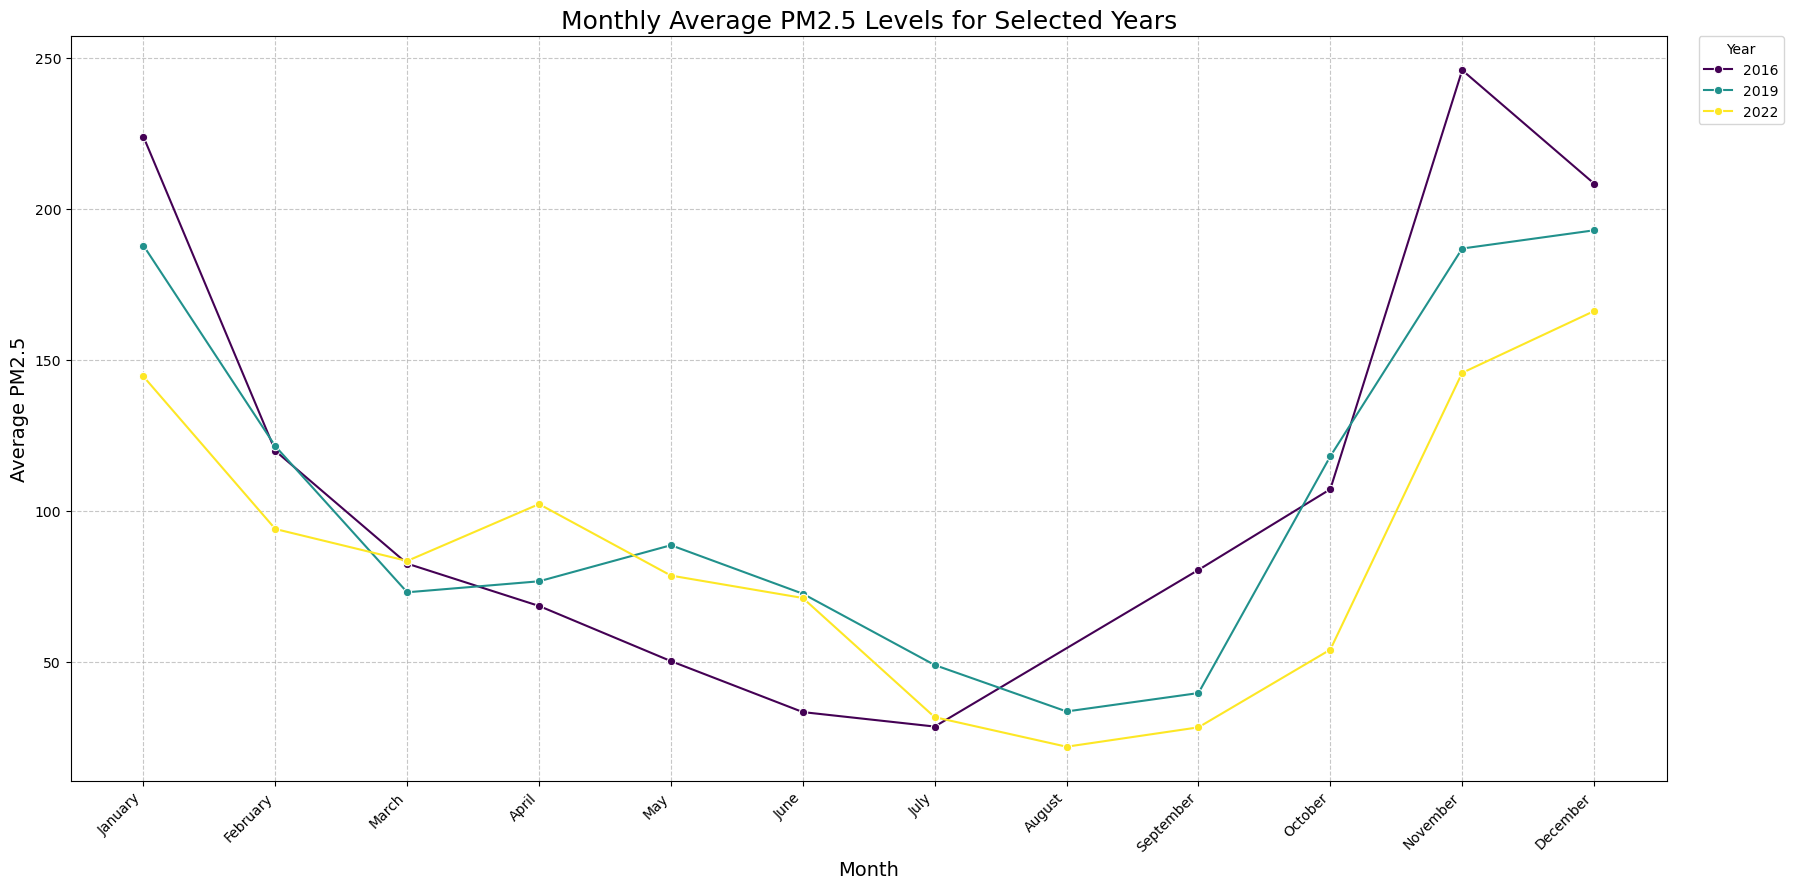

In [51]:
# Define the selected years for the new plot
selected_plot_years = [2016, 2019, 2022]

# Filter the df_monthly_plot for the selected years
df_selected_years = df_monthly_plot[df_monthly_plot['Year'].isin(selected_plot_years)]

# Ensure the selected years are sorted for consistent legend order
selected_plot_years.sort()

# Create the seasonal line plot for the selected years
plt.figure(figsize=(18, 9))
sns.lineplot(data=df_selected_years, x='Month', y='PM2.5', hue='Year', hue_order=selected_plot_years, marker='o', palette='viridis')
plt.title('Monthly Average PM2.5 Levels for Selected Years', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average PM2.5', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
# Adjust legend to be outside the plot area for better visibility
plt.legend(title='Year', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

In [52]:
df_hourly = df.resample('h').mean()
df_hourly.head()

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP
Timestamp,,,,,,,,,,,,,,
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


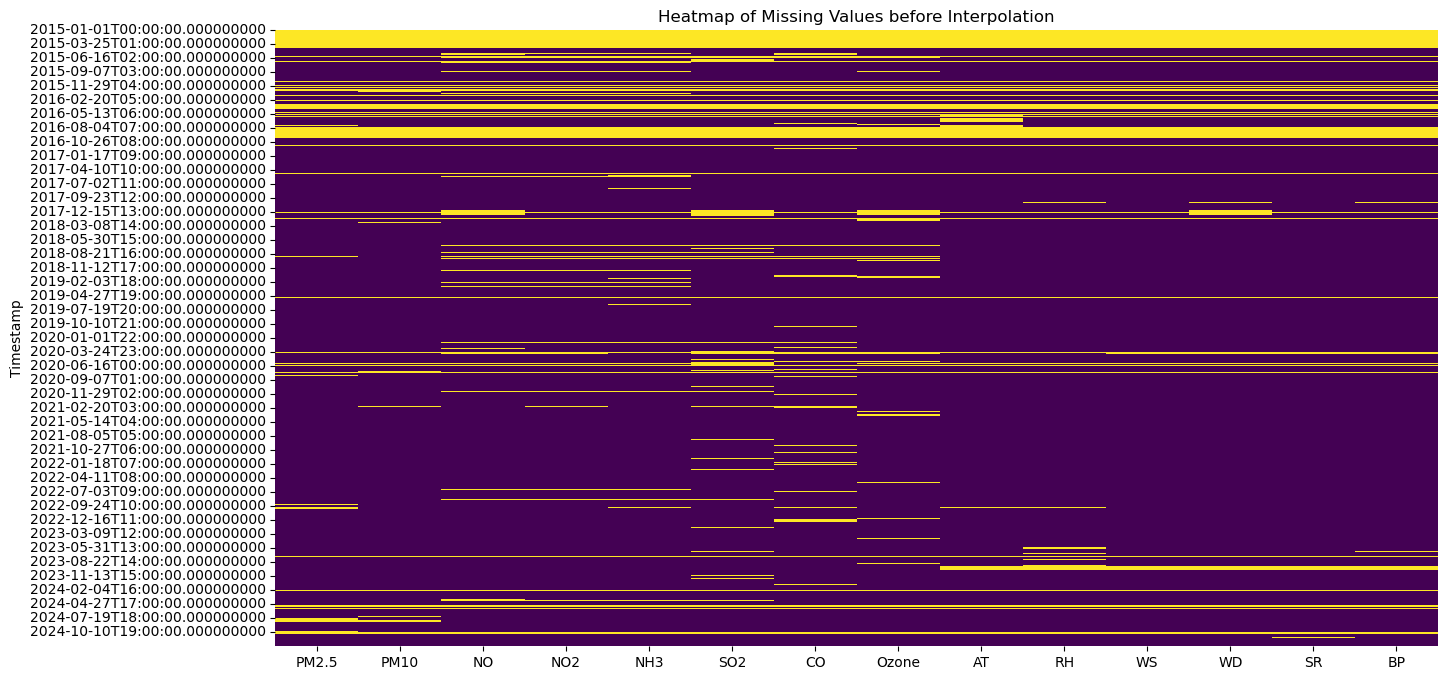

In [53]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_hourly.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values before Interpolation')
plt.show()

In [54]:
#Handle Missing Values
#Short gaps(1-3hours)
df_hourly_interpolated = df_hourly.interpolate(method='linear', limit=3)
df_hourly_interpolated.head()

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP
Timestamp,,,,,,,,,,,,,,
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


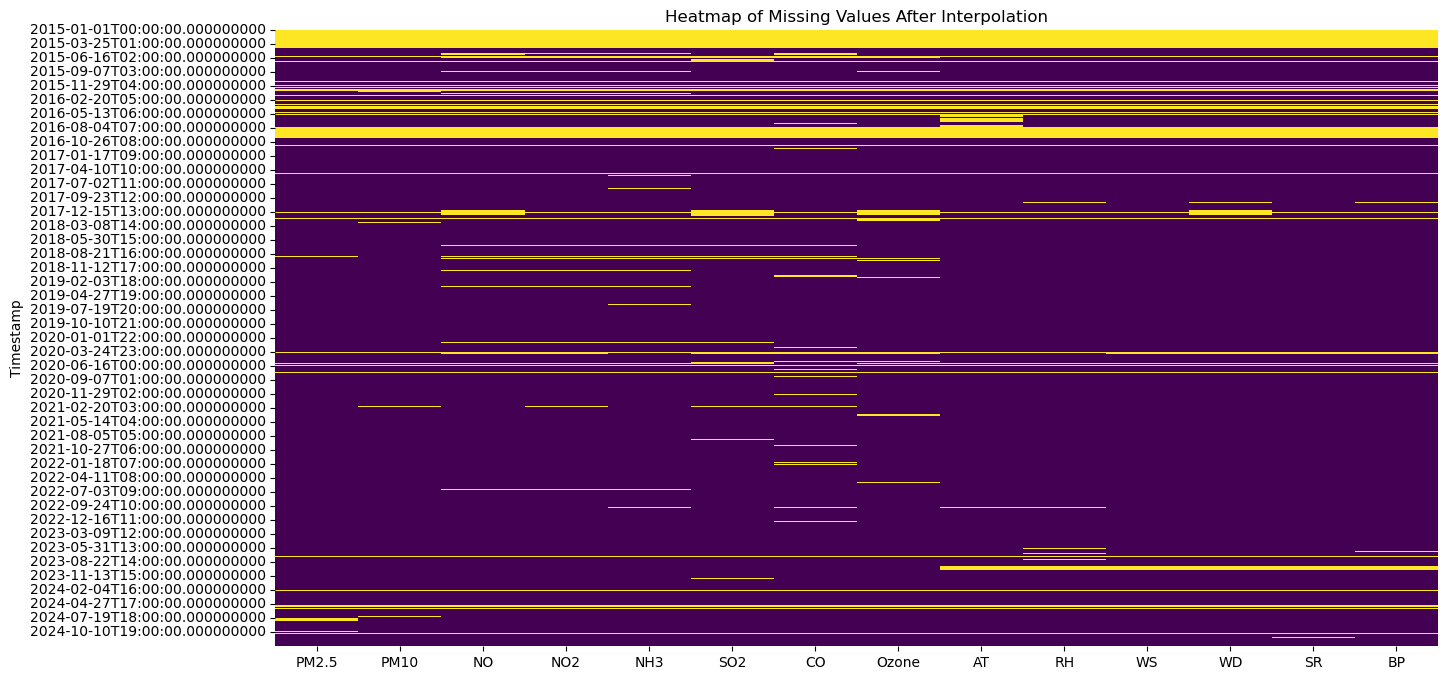

In [55]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_hourly_interpolated.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values After Interpolation')
plt.show()

In [56]:
missing_values_percentage_after_interp = df_hourly_interpolated.isnull().sum() / len(df_hourly_interpolated) * 100
print("Percentage of missing values per column in df_hourly_interpolated after interpolation:")
if (missing_values_percentage_after_interp > 0).any():
    print(missing_values_percentage_after_interp[missing_values_percentage_after_interp > 0].sort_values(ascending=False))
else:
    print("No missing values remaining in df_hourly_interpolated.")

Percentage of missing values per column in df_hourly_interpolated after interpolation:
SO2      12.128160
NO       11.779131
CO       11.639976
NH3      11.506524
Ozone    11.255589
NO2      10.899717
AT       10.810749
WD       10.567798
RH       10.453737
BP       10.093302
PM2.5     9.943882
PM10      9.907382
SR        9.772789
WS        9.627931
dtype: float64


In [57]:
df_hourly_final = df_hourly_interpolated.ffill().bfill()
print("Forward-fill and backward-fill imputation applied to df_hourly_interpolated to create df_hourly_final.")

Forward-fill and backward-fill imputation applied to df_hourly_interpolated to create df_hourly_final.


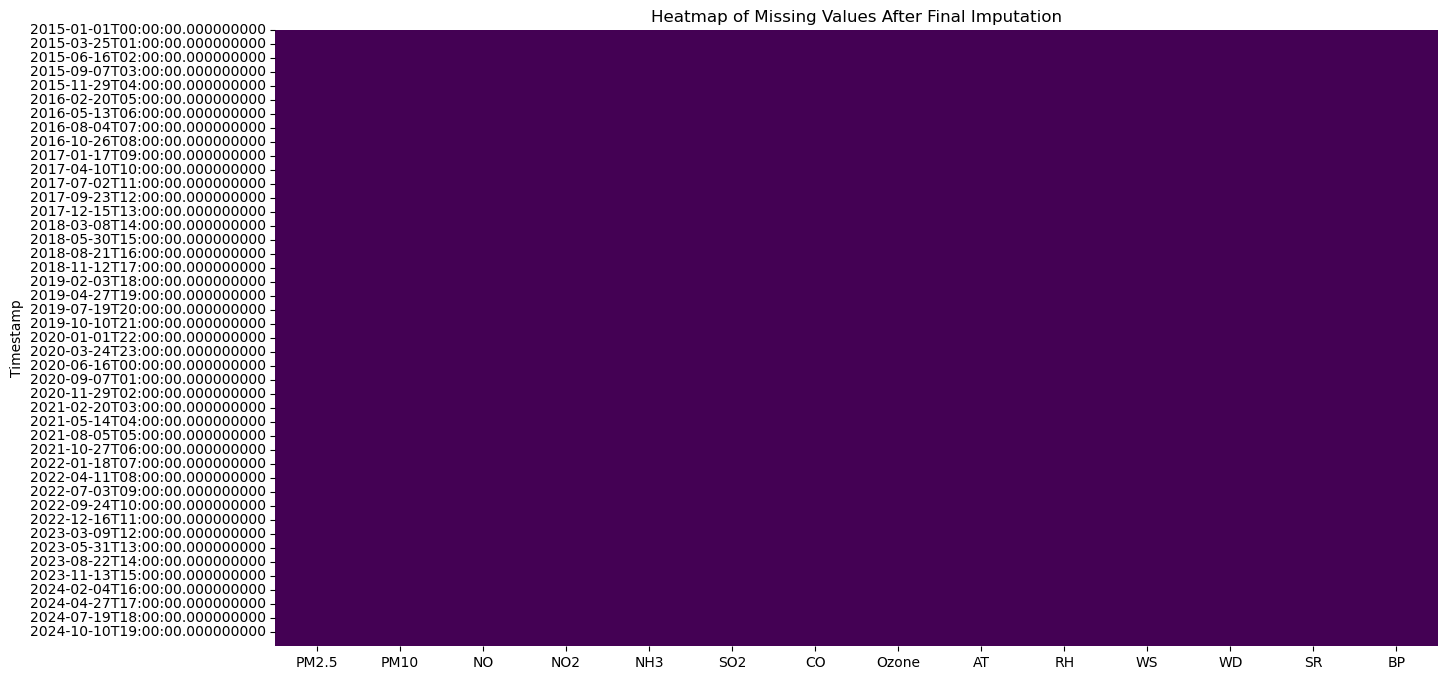

In [58]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_hourly_final.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values After Final Imputation')
plt.show()

In [59]:
missing_values_percentage = df_hourly_final.isnull().sum() / len(df_hourly_final) * 100
print("Percentage of missing values per column in df_hourly_final:")
if (missing_values_percentage > 0).any():
    print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))
else:
    print("No missing values remaining in df_hourly_final.")

Percentage of missing values per column in df_hourly_final:
No missing values remaining in df_hourly_final.


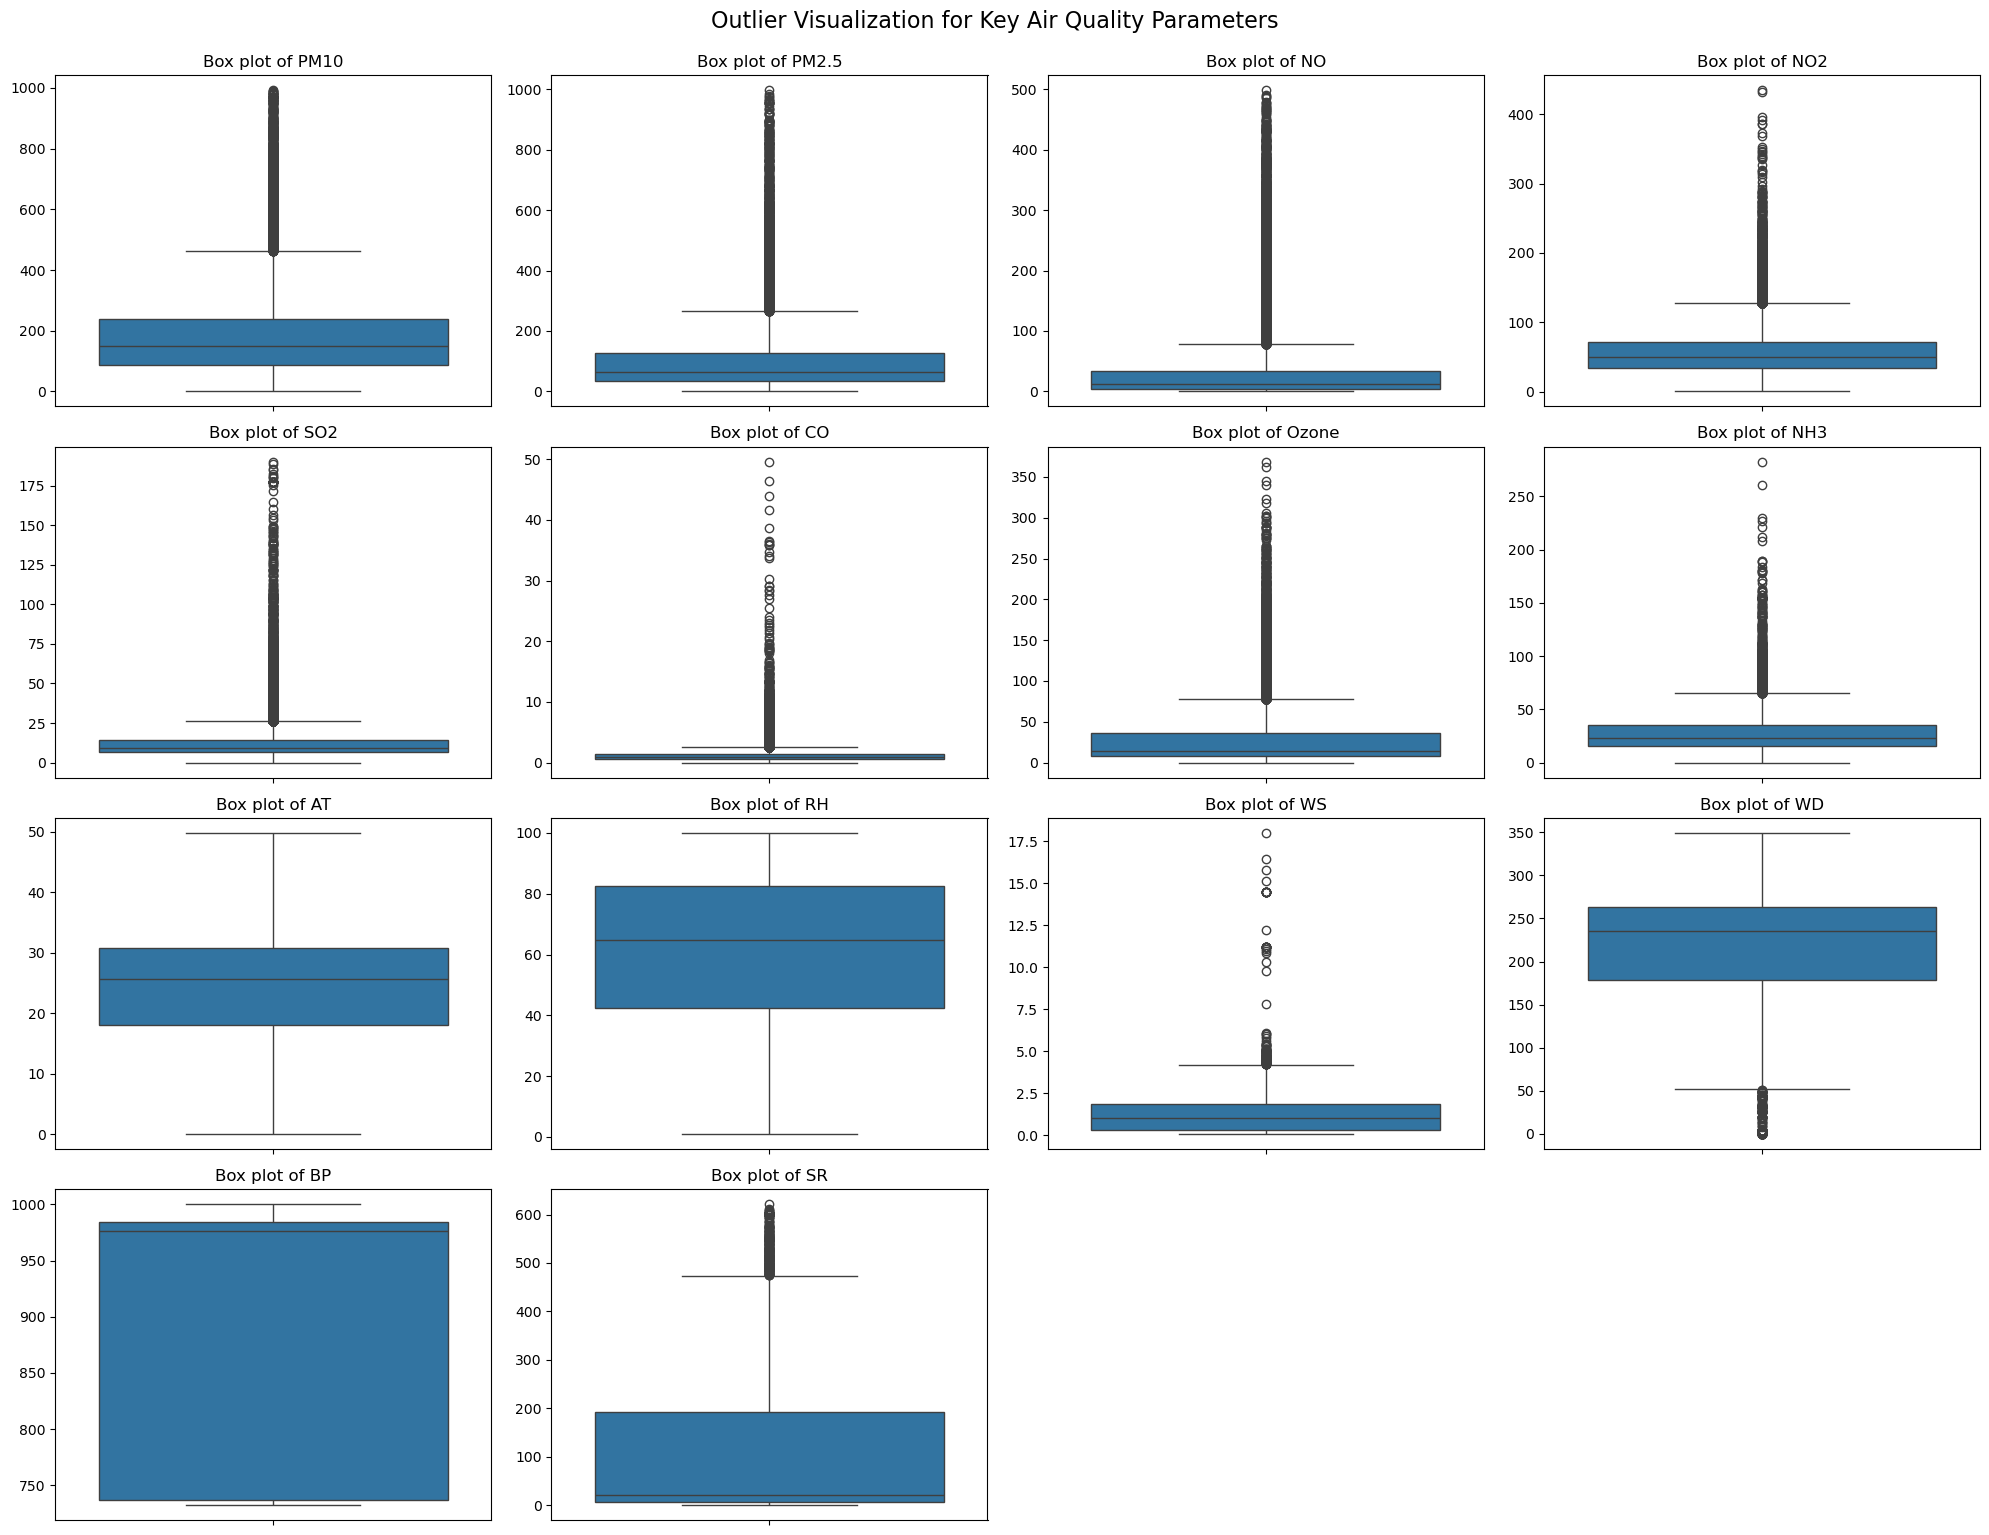

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the main air quality parameters for outlier visualization
outlier_columns = ['PM10', 'PM2.5', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'NH3', 'AT', 'RH', 'WS', 'WD', 'BP', 'SR']

# Create box plots for each selected column to visualize outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(outlier_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=df_hourly_final[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel('') # Remove y-axis label to avoid clutter
plt.tight_layout()
plt.suptitle('Outlier Visualization for Key Air Quality Parameters', y=1.02, fontsize=16)
plt.show()

In [61]:
# # remove extreme outliers
# df_hourly_final = df_hourly_final[~(df_hourly_final['PM2.5'] > 1500)]
# df_hourly_final = df_hourly_final[~(df_hourly_final['PM10'] > 1800)]
# df_hourly_final = df_hourly_final[~(df_hourly_final['CO'] < 0)]
# df_hourly_final = df_hourly_final[~(df_hourly_final['WD'] > 360)]
# df_hourly_final.head()

In [62]:
selected_columns = ['PM2.5', 'PM10', 'CO', 'WD']
print("Minimum values for selected columns:")
print(df_hourly_final[selected_columns].min())
print("\nMaximum values for selected columns:")
print(df_hourly_final[selected_columns].max())

Minimum values for selected columns:
PM2.5    0.27
PM10     0.17
CO       0.00
WD       0.03
dtype: float64

Maximum values for selected columns:
PM2.5    996.00
PM10     992.00
CO        49.62
WD       349.32
dtype: float64


In [63]:
# time features
# Add:
df_hourly_final['hour'] = df_hourly_final.index.hour
df_hourly_final['dayofweek'] = df_hourly_final.index.dayofweek

df_hourly_final.head()

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,WS,WD,SR,BP,hour,dayofweek
Timestamp,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,3.1,189.0,376.0,735.0,0,3
2015-01-01 01:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,3.1,189.0,376.0,735.0,1,3
2015-01-01 02:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,3.1,189.0,376.0,735.0,2,3
2015-01-01 03:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,3.1,189.0,376.0,735.0,3,3
2015-01-01 04:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,3.1,189.0,376.0,735.0,4,3


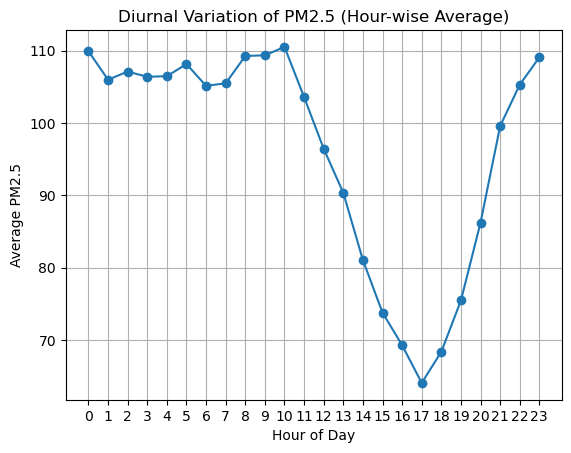

In [64]:
#hour wise Lineplot during day
hourly_pm25 = df_hourly_final.groupby(df_hourly_final.index.hour)['PM2.5'].mean()

plt.figure()
plt.plot(hourly_pm25.index, hourly_pm25.values, marker='o')
plt.xticks(range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Average PM2.5")
plt.title("Diurnal Variation of PM2.5 (Hour-wise Average)")
plt.grid(True)
plt.show()

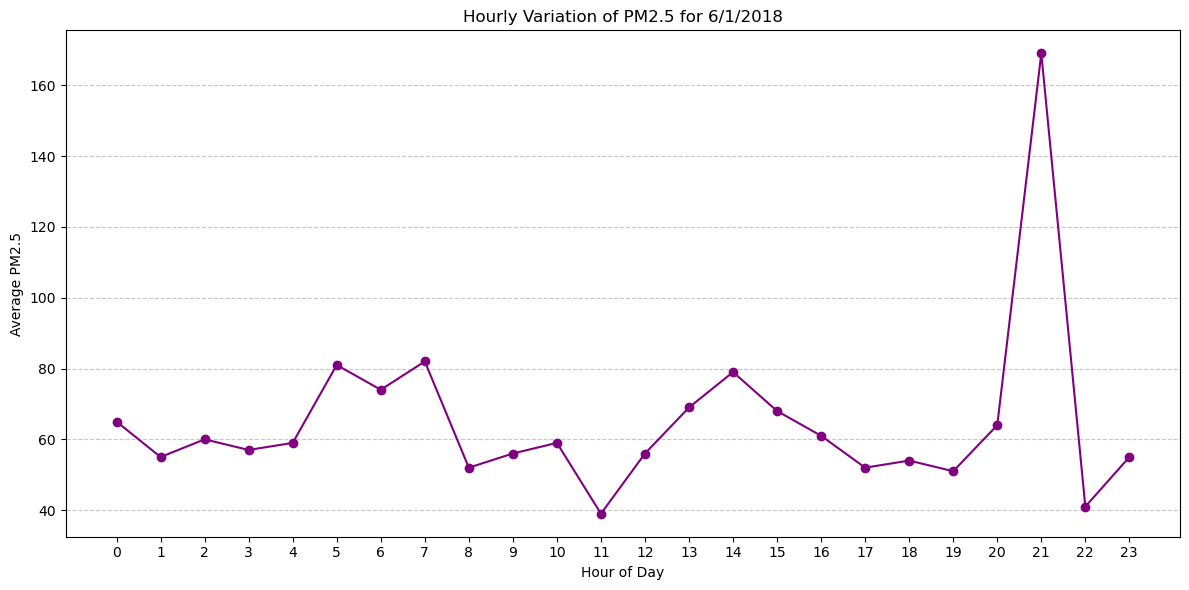

In [65]:
#@title Select Year, Month, and Day for Hourly PM2.5 Analysis
selected_year_hourly = 2018 # @param {type:"integer"}
selected_month_hourly = 6 # @param {type:"integer"}
selected_day_hourly = 1 # @param {type:"integer"}

# Filter data for the selected year, month, and day
df_selected_day = df_hourly_final[
    (df_hourly_final.index.year == selected_year_hourly) &
    (df_hourly_final.index.month == selected_month_hourly) &
    (df_hourly_final.index.day == selected_day_hourly)
]

# Group by hour and calculate the mean PM2.5 (should be one value per hour if data is complete)
hourly_pm25_selected_day = df_selected_day.groupby(df_selected_day.index.hour)['PM2.5'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(hourly_pm25_selected_day.index, hourly_pm25_selected_day.values, marker='o', linestyle='-', color='purple')
plt.xlabel("Hour of Day")
plt.ylabel("Average PM2.5")
plt.title(f"Hourly Variation of PM2.5 for {selected_month_hourly}/{selected_day_hourly}/{selected_year_hourly}")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24)) # Ensure all 24 hours are marked on x-axis
plt.tight_layout()
plt.show()

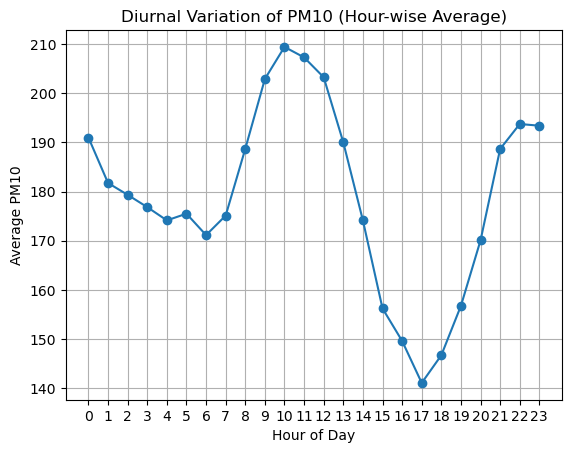

In [66]:
#hour wise Lineplot during day
hourly_pm10 = df_hourly_final.groupby(df_hourly_final.index.hour)['PM10'].mean()

plt.figure()
plt.plot(hourly_pm10.index, hourly_pm10.values, marker='o')
plt.xticks(range(0,24))
plt.xlabel("Hour of Day")
plt.ylabel("Average PM10")
plt.title("Diurnal Variation of PM10 (Hour-wise Average)")
plt.grid(True)
plt.show()

In [67]:
#day vs night comparison
day_pm25 = df_hourly_final[df_hourly_final['hour'].between(6,18)]['PM2.5'].mean()
night_pm25 = df_hourly_final[~df_hourly_final['hour'].between(6,18)]['PM2.5'].mean()

print("Average Daytime PM2.5:", round(day_pm25,2))
print("Average Nighttime PM2.5", round(night_pm25,2))

Average Daytime PM2.5: 91.28
Average Nighttime PM2.5 101.79


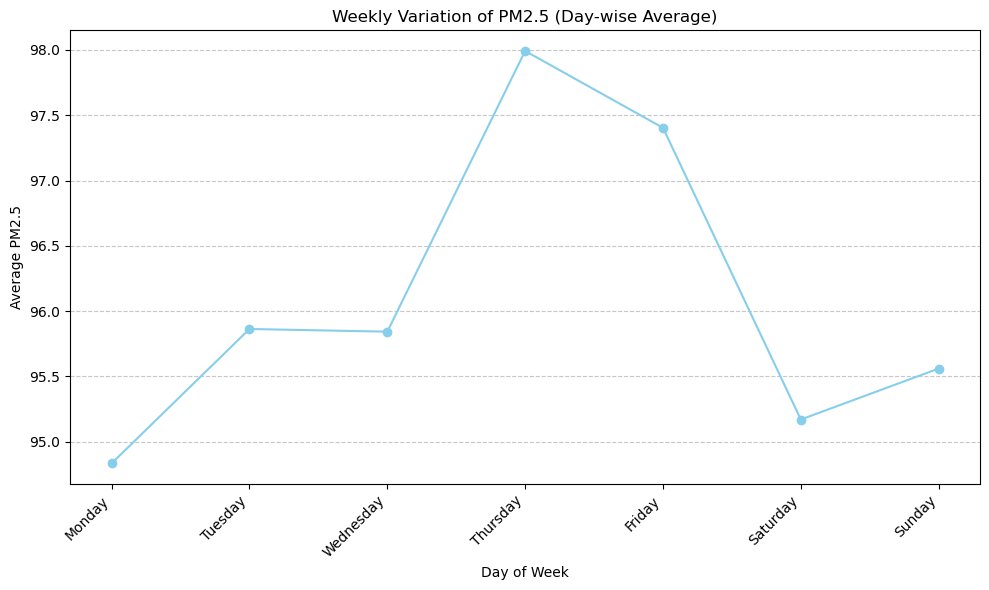

In [68]:
#day wise peak in week
weekly_pm25 = df_hourly_final.groupby(df_hourly_final.index.dayofweek)['PM2.5'].mean()

# Map day of week numbers to names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pm25.index = weekly_pm25.index.map(lambda x: day_names[x])

plt.figure(figsize=(10, 6))
plt.plot(weekly_pm25.index, weekly_pm25.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel("Day of Week")
plt.ylabel("Average PM2.5")
plt.title("Weekly Variation of PM2.5 (Day-wise Average)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

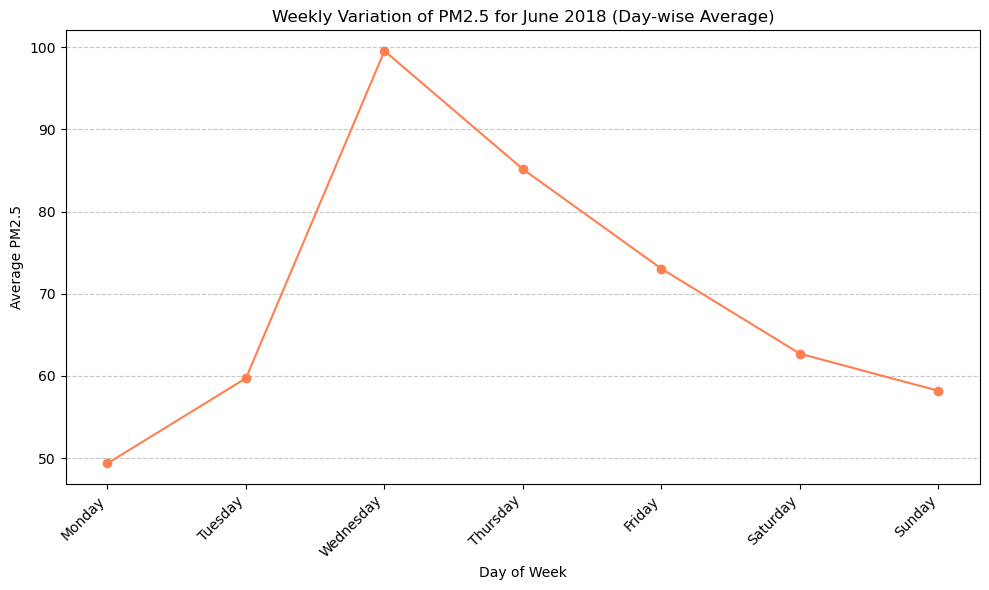

In [69]:
#@title Select Year and Month for Weekly PM2.5 Analysis
selected_year = 2018 # @param {type:"integer"}
selected_month = 6 # @param {type:"integer"}  # 1 for January, 2 for February, etc.

# Filter data for the selected year and month
df_selected_period = df_hourly_final[
    (df_hourly_final.index.year == selected_year) &
    (df_hourly_final.index.month == selected_month)
]

# Group by day of the week and calculate the mean PM2.5
weekly_pm25_selected_period = df_selected_period.groupby(df_selected_period.index.dayofweek)['PM2.5'].mean()

# Map day of week numbers to names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pm25_selected_period.index = weekly_pm25_selected_period.index.map(lambda x: day_names[x])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekly_pm25_selected_period.index, weekly_pm25_selected_period.values, marker='o', linestyle='-', color='coral')
plt.xlabel("Day of Week")
plt.ylabel("Average PM2.5")
plt.title(f"Weekly Variation of PM2.5 for {pd.to_datetime(str(selected_year) + '-' + str(selected_month) + '-01').strftime('%B %Y')} (Day-wise Average)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


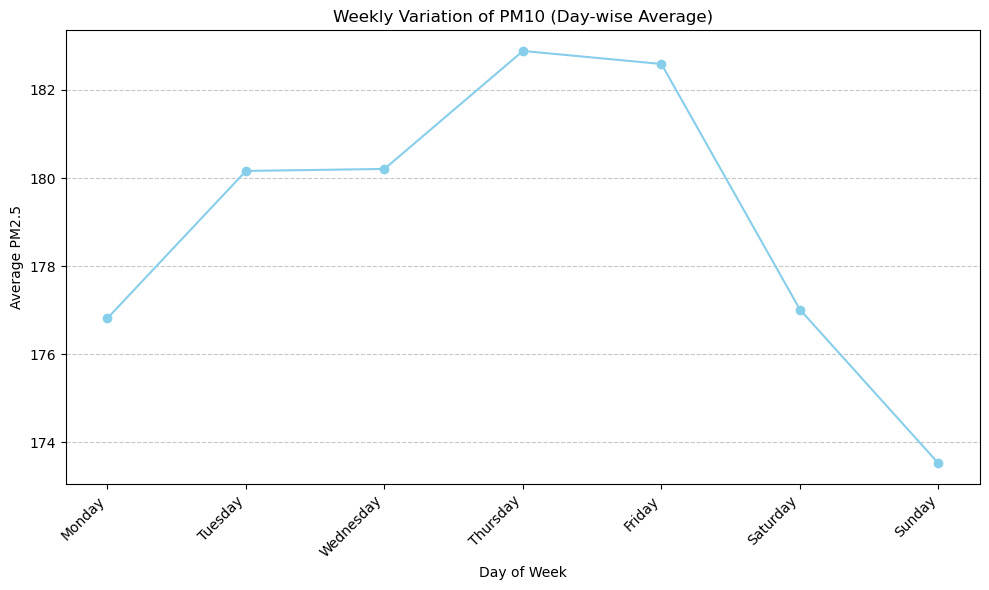

In [70]:
#day wise peak in week
weekly_pm10 = df_hourly_final.groupby(df_hourly_final.index.dayofweek)['PM10'].mean()

# Map day of week numbers to names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_pm10.index = weekly_pm10.index.map(lambda x: day_names[x])

plt.figure(figsize=(10, 6))
plt.plot(weekly_pm10.index, weekly_pm10.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel("Day of Week")
plt.ylabel("Average PM2.5")
plt.title("Weekly Variation of PM10 (Day-wise Average)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\PushpRaj\AppData\Local\Temp\ipykernel_16396\2697134124.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_pm25_overall = df_monthly_plot.groupby('Month')['PM2.5'].mean()


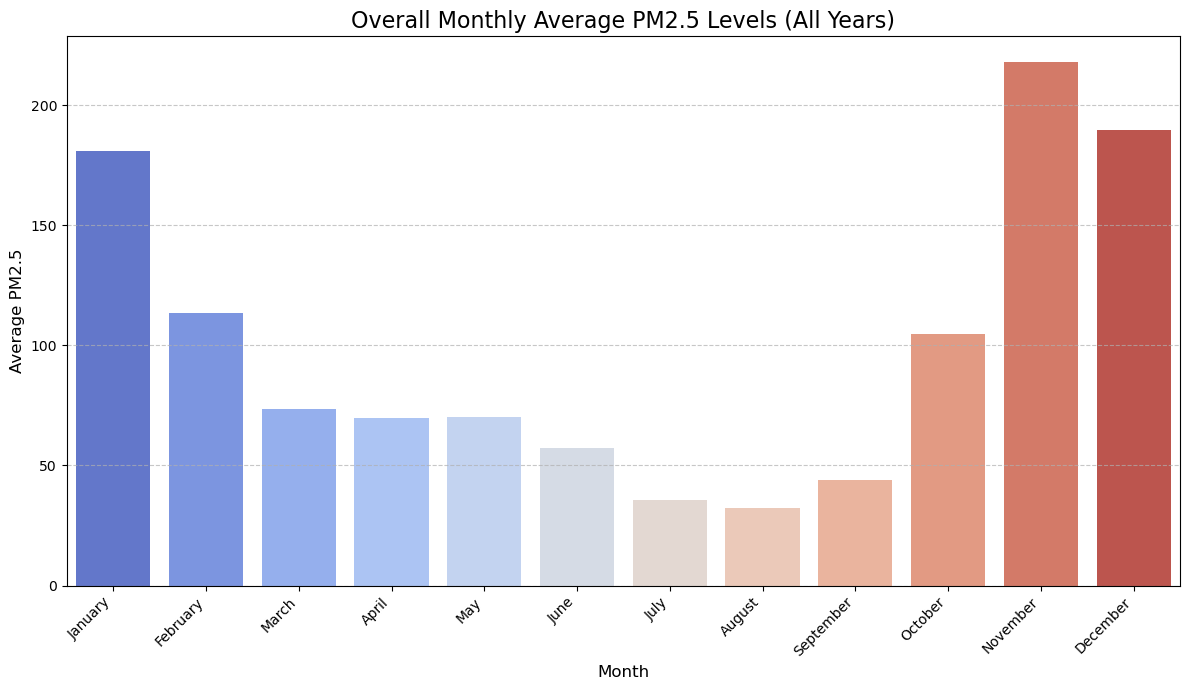

In [71]:
#month wise peak
monthly_avg_pm25_overall = df_monthly_plot.groupby('Month')['PM2.5'].mean()

plt.figure(figsize=(12, 7))
sns.barplot(x=monthly_avg_pm25_overall.index, y=monthly_avg_pm25_overall.values, hue=monthly_avg_pm25_overall.index, palette='coolwarm', legend=False)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average PM2.5', fontsize=12)
plt.title('Overall Monthly Average PM2.5 Levels (All Years)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [72]:
#feature engineering
#lag feature (for LightGBM)
for lag in [1, 2, 3, 6, 12, 24]:
    df_hourly_final[f'PM2.5_lag_{lag}'] = df_hourly_final['PM2.5'].shift(lag)
    df_hourly_final[f'PM10_lag_{lag}'] = df_hourly_final['PM10'].shift(lag)
    df_hourly_final[f'AT_lag_{lag}'] = df_hourly_final['AT'].shift(lag)
    df_hourly_final[f'RH_lag_{lag}'] = df_hourly_final['RH'].shift(lag)

df_hourly_final.head()

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,...,AT_lag_6,RH_lag_6,PM2.5_lag_12,PM10_lag_12,AT_lag_12,RH_lag_12,PM2.5_lag_24,PM10_lag_24,AT_lag_24,RH_lag_24
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 02:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 03:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 04:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#rolling features
# Create rolling windows:
for window in [3, 6, 12, 24]:
    df_hourly_final[f'PM2.5_rolling_mean_{window}h'] = df_hourly_final['PM2.5'].rolling(window=window).mean()
    df_hourly_final[f'PM10_rolling_mean_{window}h'] = df_hourly_final['PM10'].rolling(window=window).mean()

df_hourly_final.tail()

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,...,AT_lag_24,RH_lag_24,PM2.5_rolling_mean_3h,PM10_rolling_mean_3h,PM2.5_rolling_mean_6h,PM10_rolling_mean_6h,PM2.5_rolling_mean_12h,PM10_rolling_mean_12h,PM2.5_rolling_mean_24h,PM10_rolling_mean_24h
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-12-31 19:00:00,193.0,245.0,8.85,80.25,57.62,4.42,1.82,24.80,11.05,88.75,...,10.95,89.50,220.666667,290.666667,209.666667,277.000000,168.833333,215.250000,142.791667,183.166667
2024-12-31 20:00:00,165.0,226.0,12.60,76.10,56.40,3.95,1.94,26.55,10.35,90.75,...,11.50,91.25,197.333333,260.333333,207.000000,277.500000,171.333333,222.166667,145.166667,187.041667
2024-12-31 21:00:00,181.0,222.0,20.80,76.18,56.85,0.50,2.09,29.55,9.90,91.75,...,11.90,92.00,179.666667,231.000000,205.500000,271.666667,177.583333,229.500000,147.791667,190.333333
2024-12-31 22:00:00,210.0,245.0,43.68,91.85,57.38,0.50,2.47,35.70,9.60,93.00,...,11.58,92.00,185.333333,231.000000,203.000000,260.833333,186.750000,239.333333,151.291667,193.625000
2024-12-31 23:00:00,244.0,284.0,51.98,98.18,57.40,0.50,2.48,37.20,9.12,93.25,...,12.18,92.00,211.666667,250.333333,204.500000,255.333333,196.500000,250.500000,156.083333,198.333333


In [74]:
#encode wind direction
# Convert WD → two features:

df_hourly_final['WD_sin'] = np.sin(np.deg2rad(df_hourly_final['WD']))
df_hourly_final['WD_cos'] = np.cos(np.deg2rad(df_hourly_final['WD']))
df_hourly_final.head()

,PM2.5,PM10,NO,NO2,NH3,SO2,CO,Ozone,AT,RH,...,PM2.5_rolling_mean_3h,PM10_rolling_mean_3h,PM2.5_rolling_mean_6h,PM10_rolling_mean_6h,PM2.5_rolling_mean_12h,PM10_rolling_mean_12h,PM2.5_rolling_mean_24h,PM10_rolling_mean_24h,WD_sin,WD_cos
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156434,-0.987688
2015-01-01 01:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.156434,-0.987688
2015-01-01 02:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,38.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.156434,-0.987688
2015-01-01 03:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,38.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.156434,-0.987688
2015-01-01 04:00:00,38.0,61.0,21.94,16.6,70.19,8.17,1.08,112.91,30.8,24.0,...,38.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.156434,-0.987688


In [75]:
# #spliting data
# Do NOT shuffle.

# Use chronological split:
# 80% training
# 20% testing
# This preserves temporal integrity.

train_size = int(len(df_hourly_final) * 0.8)
train_df = df_hourly_final.iloc[:train_size]
test_df = df_hourly_final.iloc[train_size:]

print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

Training data shape: (70137, 50)
Testing data shape: (17535, 50)


In [76]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [77]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define target and features
target = 'PM2.5'

# Drop original columns that were transformed into lag or rolling features
# and columns not suitable as features (e.g., original WD)
# Also, drop columns that are not present in the training data yet due to NaNs from feature engineering.

# Drop rows with NaN values that result from lag and rolling features
train_df_cleaned = train_df.dropna()
test_df_cleaned = test_df.dropna()

# Exclude target and the original columns for which lagged/rolling features were created
features = [col for col in train_df_cleaned.columns if col not in [target, 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'NH3', 'AT', 'RH', 'WS', 'WD', 'BP', 'SR']]

X_train = train_df_cleaned[features]
y_train = train_df_cleaned[target]
X_test = test_df_cleaned[features]
y_test = test_df_cleaned[target]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize and train LightGBM Regressor model
model = lgb.LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate MAPE (handling division by zero)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"\nLightGBM Model Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R²: {r2:.4f}")

X_train shape: (70113, 36)
y_train shape: (70113,)
X_test shape: (17535, 36)
y_test shape: (17535,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8701
[LightGBM] [Info] Number of data points in the train set: 70113, number of used features: 36
[LightGBM] [Info] Start training from score 97.058897

LightGBM Model Evaluation:
RMSE: 8.3573
MAE: 3.8231
MAPE: 8.7651%
R²: 0.9916


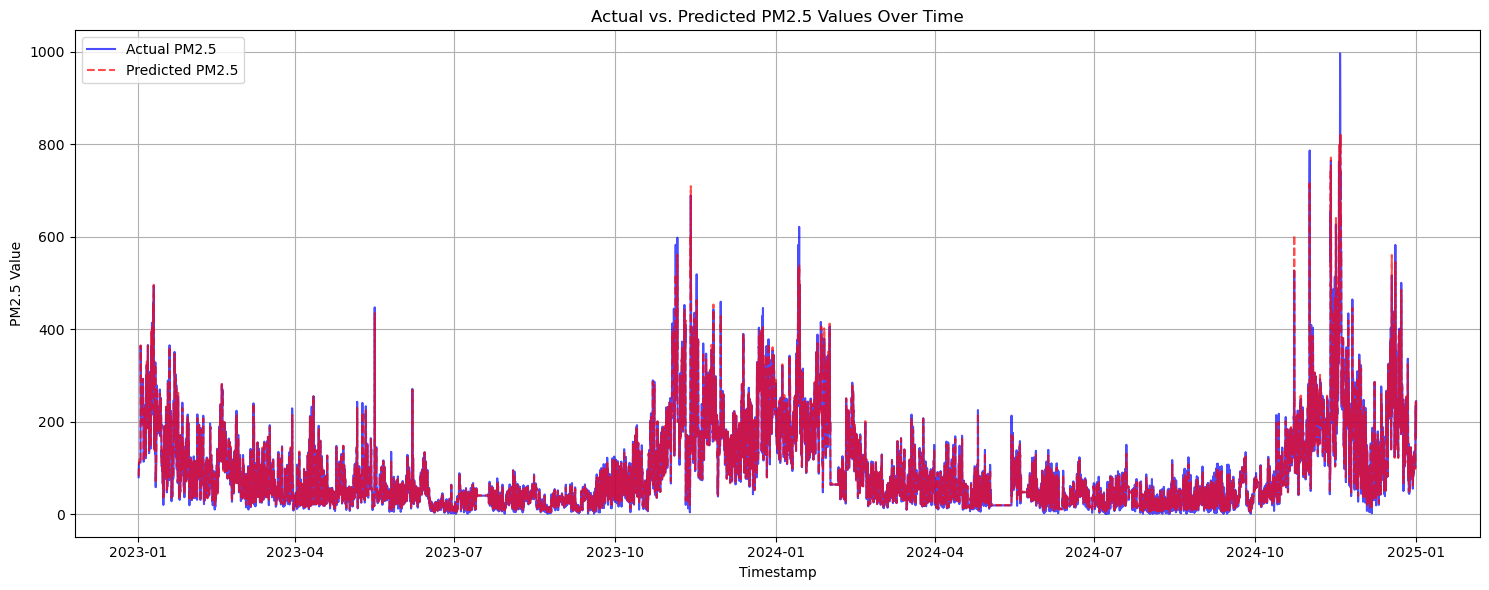

In [78]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual PM2.5', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted PM2.5', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs. Predicted PM2.5 Values Over Time')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

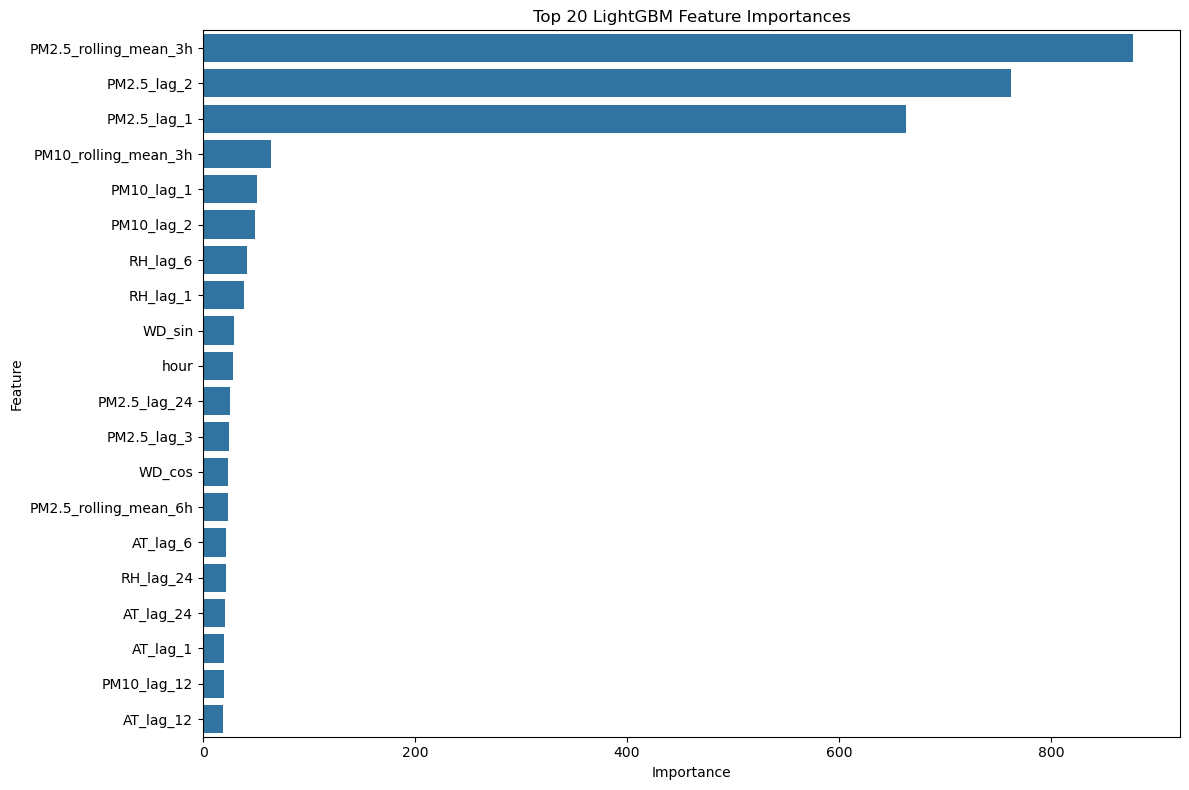

In [79]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 LightGBM Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()